This is the dataset related to RETAIL BUSINESS

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  

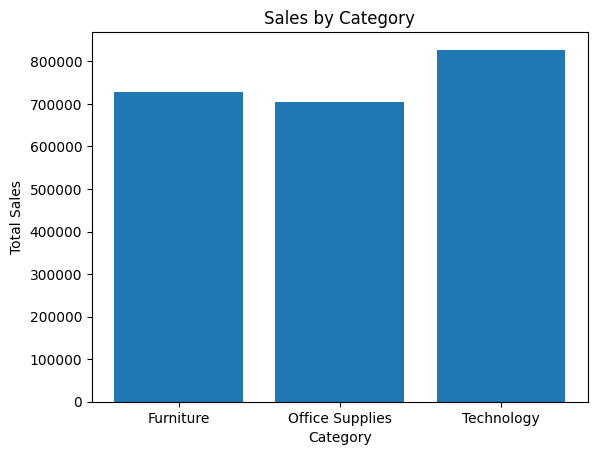

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

print("This is the dataset related to RETAIL BUSINESS\n")
df = pd.read_csv('Downloads/train.csv')

# Quick look at the data
print(df.head())
print(df.info())

print("-----------------------------------------------------------")
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Remove duplicates
df = df.drop_duplicates()

# Shipping Duration
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract Month, Year, Quarter
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

print("-----------------------------------------------------------")

# Sales-based measures
print("\nSales-based measures\n")
df['Cumulative Sales'] = df['Sales'].cumsum()

print("-----------------------------------------------------------")

# Aggregations for KPIs
print("\nTotal Sales by Year\n")
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
print(sales_by_year)

print("-----------------------------------------------------------")

print("\nTotal Sales by Category\n")
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print(sales_by_category)

print("-----------------------------------------------------------")

print("\nTotal Sales by Region\n")
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
print(sales_by_region)

print("-----------------------------------------------------------")

print("\nAverage shipping duration by Region\n")
avg_shipping_by_region = df.groupby('Region')['Shipping Days'].mean().reset_index()
print(avg_shipping_by_region)

print("-----------------------------------------------------------")

# Export cleaned and enriched dataset for Power BI
df.to_csv('train_cleaned.csv', index=False)
sales_by_year.to_csv('sales_by_year.csv', index=False)
sales_by_category.to_csv('sales_by_category.csv', index=False)
sales_by_region.to_csv('sales_by_region.csv', index=False)
avg_shipping_by_region.to_csv('avg_shipping_by_region.csv', index=False)

print("-----------------------------------------------------------")

# Visualization
plt.bar(sales_by_category['Category'], sales_by_category['Sales'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [17]:
# Check the actual column names
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Shipping Days', 'Month', 'Year', 'Quarter', 'Cumulative Sales']


This is the dataset related to RETAIL BUSINESS

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  

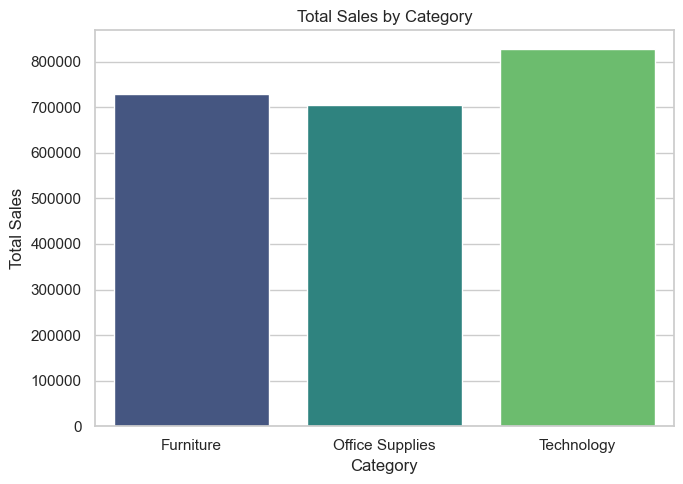

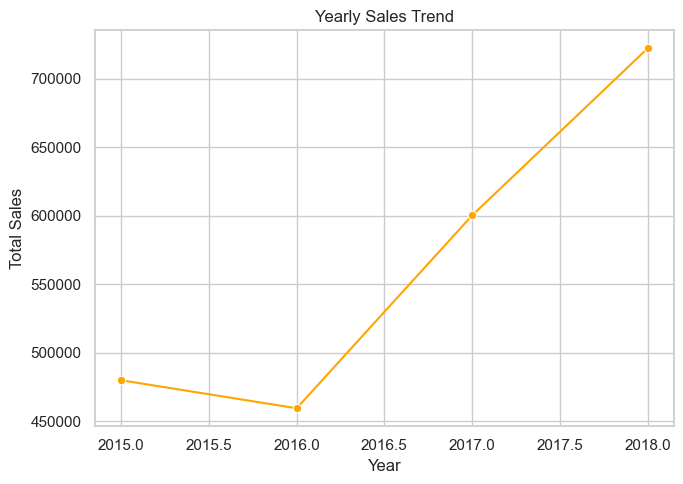

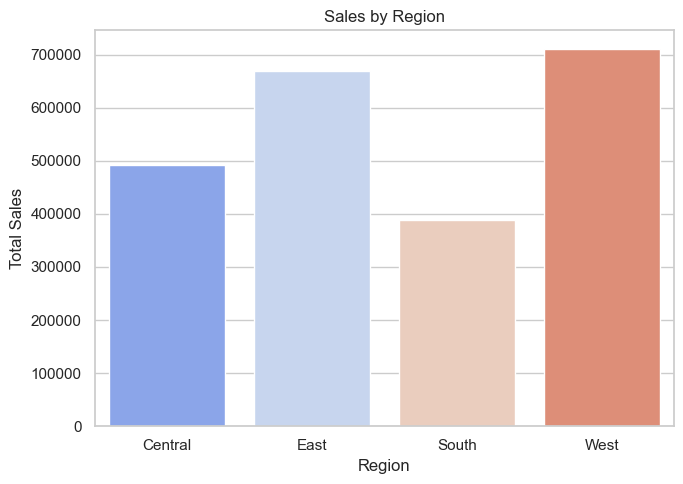

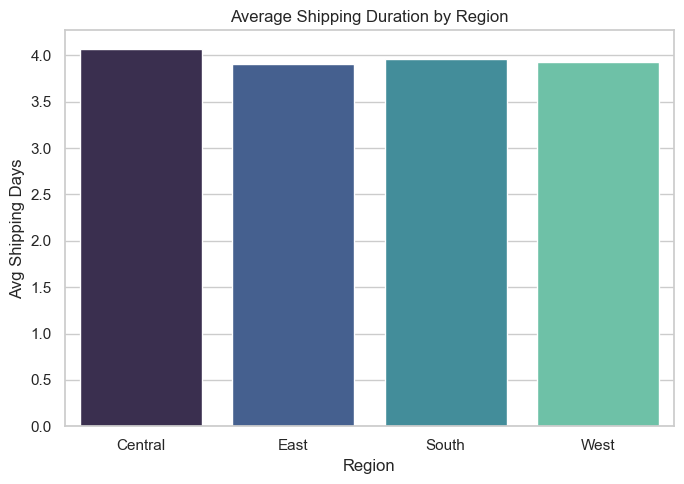

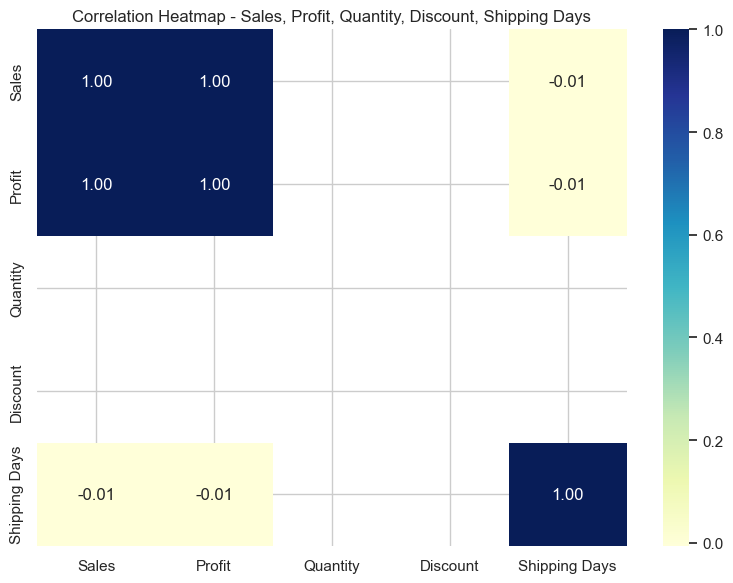

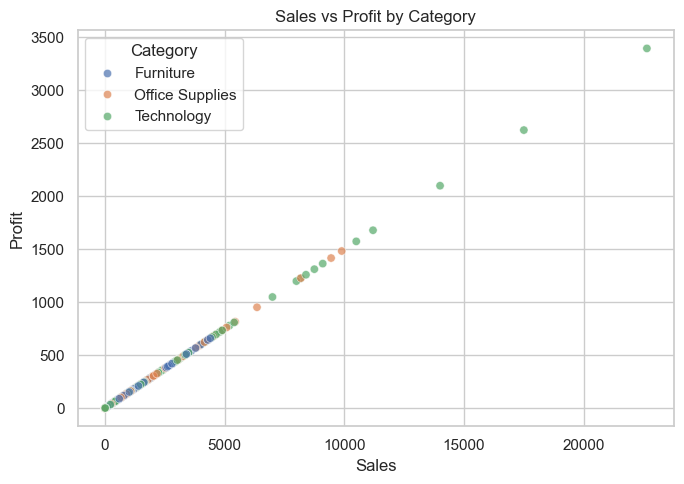

 All visualizations generated successfully


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("This is the dataset related to RETAIL BUSINESS\n")
df = pd.read_csv('Downloads/train.csv')


print(df.head())
print(df.info())

print("-----------------------------------------------------------")

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

# Shipping Duration
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract Month, Year, Quarter
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

print("-----------------------------------------------------------")

# Fill missing columns if necessary
if 'Profit' not in df.columns:
    df['Profit'] = df['Sales'] * 0.15
if 'Quantity' not in df.columns:
    df['Quantity'] = 1
if 'Discount' not in df.columns:
    df['Discount'] = 0

# Aggregations
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
avg_shipping_by_region = df.groupby('Region')['Shipping Days'].mean().reset_index()

# Export cleaned dataset
df.to_csv('train_cleaned.csv', index=False)

print("-----------------------------------------------------------")

# -------------------- VISUALIZATIONS --------------------

sns.set(style='whitegrid')

# Sales by Category
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', hue='Category', data=sales_by_category, palette='viridis', legend=False)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

#  Yearly Sales Trend
plt.figure(figsize=(7,5))
sns.lineplot(x='Year', y='Sales', data=sales_by_year, marker='o', color='orange')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Sales by Region
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', hue='Region', data=sales_by_region, palette='coolwarm', legend=False)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

#  Average Shipping Days by Region
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Shipping Days', hue='Region', data=avg_shipping_by_region, palette='mako', legend=False)
plt.title('Average Shipping Duration by Region')
plt.xlabel('Region')
plt.ylabel('Avg Shipping Days')
plt.tight_layout()
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Days']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap - Sales, Profit, Quantity, Discount, Shipping Days')
plt.tight_layout()
plt.show()

# 6️⃣ Scatterplot: Sales vs Profit
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

print(" All visualizations generated successfully")
